In [70]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [1]:
pwd()

'C:\\Users\\MANOJ GARIKAPATI\\Python_ML\\Project_3_Medicine'

In [72]:
train_df = pd.read_csv("counterfeit_train.csv")

In [73]:
test_df = pd.read_csv("counterfeit_test.csv")

In [74]:
train_df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [75]:
test_df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


In [7]:
train_df.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [8]:
train_df['Medicine_Type'].nunique()

16

In [9]:
train_df['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [10]:
train_df['Medicine_Type'].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [11]:
min(train_df['Counterfeit_Sales'])

146.29

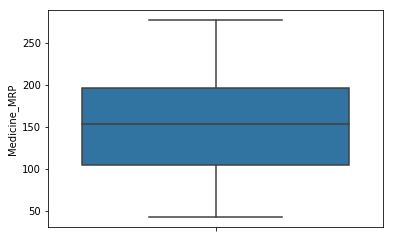

In [12]:
import seaborn as sns
%matplotlib inline
sns.boxplot(y='Medicine_MRP',data=train_df);

In [76]:
train_df['data'] = "train"

In [77]:
test_df['data'] = "test"

In [78]:
all_df = pd.concat([train_df, test_df],axis=0)

In [79]:
list(zip(all_df.columns,all_df.isnull().sum(),all_df.nunique(),all_df.dtypes))

[('Active_Since', 0, 9, dtype('int64')),
 ('Area_City_Type', 0, 3, dtype('O')),
 ('Area_Type', 0, 4, dtype('O')),
 ('Area_dist_level', 0, 4, dtype('O')),
 ('Availability_rating', 0, 7884, dtype('float64')),
 ('Counterfeit_Sales', 1705, 3142, dtype('float64')),
 ('Counterfeit_Weight', 1463, 415, dtype('float64')),
 ('DistArea_ID', 0, 10, dtype('O')),
 ('Medicine_ID', 0, 1557, dtype('O')),
 ('Medicine_MRP', 0, 5970, dtype('float64')),
 ('Medicine_Type', 0, 16, dtype('O')),
 ('SidEffect_Level', 0, 2, dtype('O')),
 ('data', 0, 2, dtype('O'))]

In [80]:
char_cols = all_df.select_dtypes(['object']).columns

In [81]:
char_cols

Index(['Area_City_Type', 'Area_Type', 'Area_dist_level', 'DistArea_ID',
       'Medicine_ID', 'Medicine_Type', 'SidEffect_Level', 'data'],
      dtype='object')

In [82]:
char_cols = char_cols[:-1]

In [83]:
char_cols = ['Area_City_Type', 'Area_Type', 'Area_dist_level', 'DistArea_ID', 'Medicine_Type', 'SidEffect_Level']

In [84]:
for col in char_cols:
    k = all_df[col].value_counts()
    cats = k.index[k > 200]
    cats=cats[:-1]
    
    for cat in cats:
        name = col+"_"+cat
        all_df[name] = (all_df[col]==cat).astype(int)
    
    del all_df[col]

In [85]:
all_df.head()

,Active_Since,Availability_rating,Counterfeit_Sales,Counterfeit_Weight,Medicine_ID,Medicine_MRP,data,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,...,Medicine_Type_Antiseptics,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,SidEffect_Level_mild
0,1995,0.070422,1775.5026,13.100,RRA15,160.2366,train,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1983,0.013000,3069.1520,NaN,YVV26,110.4384,train,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1995,0.060783,2603.0920,9.025,LJC15,259.4092,train,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1995,0.065555,1101.7130,11.800,GWC40,99.9830,train,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,1983,0.248859,158.9402,NaN,QMN13,56.4402,train,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
k=train_df.groupby(['Medicine_ID'])['Counterfeit_Weight'].mean()

In [87]:
k=pd.DataFrame(k)

In [88]:
k.reset_index(inplace=True)

In [89]:
k.rename({'Counterfeit_Weight':'cw_temp'},inplace=True,axis=1)

In [90]:
k

,Medicine_ID,cw_temp
0,AAJ32,9.400
1,AAS12,15.800
2,ACC80,18.050
3,ACW12,20.650
4,ADE15,6.510
5,ADO13,16.800
6,ADT76,21.150
7,AEF11,NaN
8,AEL80,21.500
9,AEN20,8.800


In [91]:
all_df=pd.merge(all_df,k,on="Medicine_ID",how='left')

In [92]:
del all_df['Counterfeit_Weight']

In [93]:
all_df.head()

,Active_Since,Availability_rating,Counterfeit_Sales,Medicine_ID,Medicine_MRP,data,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,Area_Type_MidTownResidential,...,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,SidEffect_Level_mild,cw_temp
0,1995,0.070422,1775.5026,RRA15,160.2366,train,0,0,1,0,...,0,0,0,0,0,0,1,0,0,13.100
1,1983,0.013000,3069.1520,YVV26,110.4384,train,1,0,0,0,...,0,0,0,1,0,0,0,0,1,7.450
2,1995,0.060783,2603.0920,LJC15,259.4092,train,0,0,1,0,...,0,0,1,0,0,0,0,0,1,9.025
3,1995,0.065555,1101.7130,GWC40,99.9830,train,0,0,1,0,...,1,0,0,0,0,0,0,0,1,11.800
4,1983,0.248859,158.9402,QMN13,56.4402,train,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.930


In [94]:
all_df['cw_temp'].isnull().sum()

30

In [95]:
all_df[all_df['cw_temp'].isnull()]

,Active_Since,Availability_rating,Counterfeit_Sales,Medicine_ID,Medicine_MRP,data,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,Area_Type_MidTownResidential,...,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,SidEffect_Level_mild,cw_temp
344,1983,0.042742,3566.5046,YYX14,99.2514,train,1,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN
502,1983,0.101840,11106.6896,ZEE32,264.5672,train,1,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
1669,1983,0.050161,274.7894,WEX14,64.5298,train,0,0,0,1,...,0,0,0,0,0,0,0,0,1,NaN
3777,1983,0.092904,4547.2280,YDD11,130.3440,train,1,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4012,1983,0.052631,1097.7182,AEF11,42.2558,train,1,0,0,0,...,1,0,0,0,0,0,0,0,1,NaN
4075,1983,0.099078,404.6204,RLS13,154.1102,train,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
4991,1983,0.090428,154.9454,LVI11,52.1454,train,0,0,0,1,...,1,0,0,0,0,0,0,0,1,NaN
5116,1983,0.040768,525.7960,QMP15,92.4592,train,0,0,0,1,...,0,0,0,1,0,0,0,0,1,NaN
5558,1983,0.169304,368.6672,ZEE32,266.6672,train,0,0,0,1,...,0,0,0,0,0,0,0,0,1,NaN
5618,1983,0.204501,233.5098,ETU15,131.5098,train,0,0,0,1,...,0,0,0,1,0,0,0,0,0,NaN


In [96]:
all_df.loc[all_df['cw_temp'].isnull(),'cw_temp'] = all_df.loc[(all_df['data']=="train"),'cw_temp'].mean()

In [97]:
all_df['cw_temp'].isnull().sum()

0

In [98]:
train = all_df[all_df['data']=="train"]
test = all_df[all_df['data']=="test"]

del train["data"]
del test["data"]

In [36]:
train.head()

,Active_Since,Availability_rating,Counterfeit_Sales,Medicine_ID,Medicine_MRP,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,...,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,SidEffect_Level_mild,cw_temp
0,1995,0.070422,1775.5026,RRA15,160.2366,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,13.100
1,1983,0.013000,3069.1520,YVV26,110.4384,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,7.450
2,1995,0.060783,2603.0920,LJC15,259.4092,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,9.025
3,1995,0.065555,1101.7130,GWC40,99.9830,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,11.800
4,1983,0.248859,158.9402,QMN13,56.4402,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8.930


In [37]:
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

C:\Users\MANOJ GARIKAPATI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30],
              "bootstrap": [True, False], 
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
rf = RandomForestRegressor()

In [39]:
x_train1=train.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)
y_train1=train['Counterfeit_Sales']

In [124]:
x_train1.head()

,Active_Since,Availability_rating,Medicine_MRP,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,Area_dist_level_Medium,Area_dist_level_Unknown,...,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,SidEffect_Level_mild,cw_temp
0,1995,0.070422,160.2366,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13.100
1,1983,0.013000,110.4384,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,7.450
2,1995,0.060783,259.4092,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,9.025
3,1995,0.065555,99.9830,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,11.800
4,1983,0.248859,56.4402,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8.930


In [129]:
# run randomized search
n_iter_search = 10
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='neg_mean_squared_error',cv=10)
random_search.fit(x_train1, y_train1)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [5, 10, 20, 25, 30], 'bootstrap': [True, False], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [48]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [131]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1146795.021 (std: 93065.86619)
Parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 30, 'max_depth': 5, 'bootstrap': True}

Model with rank: 2
Mean validation score: -1152904.394 (std: 90779.22621)
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 25, 'max_depth': 5, 'bootstrap': False}

Model with rank: 3
Mean validation score: -1171120.595 (std: 107503.76974)
Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 10, 'max_depth': 10, 'bootstrap': False}

Model with rank: 4
Mean validation score: -1180148.220 (std: 107921.81434)
Parameters: {'n_estimators': 700, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 25, 'max_depth': 20, 'bootstrap': True}

Model with rank: 5
Mean validation score: -1206843.448 (std: 113099.11708)
Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples

In [132]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [134]:
rf.fit(x_train1,y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [135]:
x_train=test.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)

In [136]:
preds=rf.predict(x_train)

In [137]:
preds

array([2591.17418, 2062.52898, 1807.06152, ..., 2777.06554, 3333.20828,
       4013.98878])

In [140]:
out_val = pd.DataFrame({'Counterfeit_Sales':preds})

In [141]:
out_val.to_csv("Manoj_Garikapati_Project3.csv",index=False)

In [31]:
cm_train1,cm_train2=train_test_split(train,test_size=0.2,random_state=2)

In [32]:
test.columns

Index(['Active_Since', 'Availability_rating', 'Counterfeit_Sales',
       'Medicine_ID', 'Medicine_MRP', 'Area_City_Type_Tier 3',
       'Area_City_Type_Tier 2', 'Area_Type_DownTown',
       'Area_Type_MidTownResidential', 'Area_Type_CityLimits',
       'Area_dist_level_Medium', 'Area_dist_level_Unknown',
       'Area_dist_level_Small', 'DistArea_ID_Area027', 'DistArea_ID_Area013',
       'DistArea_ID_Area046', 'DistArea_ID_Area049', 'DistArea_ID_Area035',
       'DistArea_ID_Area045', 'DistArea_ID_Area018', 'DistArea_ID_Area017',
       'DistArea_ID_Area010', 'Medicine_Type_Antibiotics',
       'Medicine_Type_Hreplacements', 'Medicine_Type_Antiseptics',
       'Medicine_Type_OralContraceptives', 'Medicine_Type_Antipyretics',
       'Medicine_Type_Cardiac', 'Medicine_Type_Mstablizers',
       'Medicine_Type_Tranquilizers', 'Medicine_Type_Analgesics',
       'Medicine_Type_Antimalarial', 'Medicine_Type_Antacids',
       'SidEffect_Level_mild', 'cw_temp'],
      dtype='object')

In [33]:
test.head()

,Active_Since,Availability_rating,Counterfeit_Sales,Medicine_ID,Medicine_MRP,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,...,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,SidEffect_Level_mild,cw_temp
6818,1983,0.112747,NaN,HLZ81,85.5328,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,17.40
6819,2000,0.144446,NaN,ECE94,257.1460,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,13.45
6820,2000,0.144221,NaN,SAD14,98.1172,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,7.10
6821,1996,0.100388,NaN,EQV63,135.3730,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,18.30
6822,1983,0.022585,NaN,AIR10,112.8016,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,10.19


In [34]:
# Notice that only train data is used for imputing missing values in both train and test 

x_train1=cm_train1.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)
y_train1=cm_train1['Counterfeit_Sales']

In [35]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [36]:
lm.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
x_train1.shape

(5454, 33)

In [38]:
lm.intercept_

-144.8248033566656

In [39]:
list(zip(x_train1.columns,lm.coef_))

[('Active_Since', -0.18788797505858554),
 ('Availability_rating', -266.4341986517983),
 ('Medicine_MRP', 15.422741785436017),
 ('Area_City_Type_Tier 3', 227.18724636187562),
 ('Area_City_Type_Tier 2', 300.85340490310796),
 ('Area_Type_DownTown', 504.8451609052147),
 ('Area_Type_MidTownResidential', -1025.3491820111622),
 ('Area_Type_CityLimits', 753.5127887292506),
 ('Area_dist_level_Medium', 391.5021049380762),
 ('Area_dist_level_Unknown', -158.03494471226344),
 ('Area_dist_level_Small', -189.081668989557),
 ('DistArea_ID_Area027', 753.5127887292487),
 ('DistArea_ID_Area013', -44.385491236262624),
 ('DistArea_ID_Area046', 377.37916340624184),
 ('DistArea_ID_Area049', -129.00191616787265),
 ('DistArea_ID_Area035', 209.95706610754647),
 ('DistArea_ID_Area045', -41.09467179737398),
 ('DistArea_ID_Area018', -233.008767623295),
 ('DistArea_ID_Area017', 131.99101059292815),
 ('DistArea_ID_Area010', -248.93128350781205),
 ('Medicine_Type_Antibiotics', -13.45168507199891),
 ('Medicine_Type_Hr

In [40]:
x_train2=cm_train2.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)

In [41]:
predicted_cs=lm.predict(x_train2)

In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
mean_absolute_error(cm_train2['Counterfeit_Sales'],predicted_cs)

829.5268770665357

In [44]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [45]:
lambdas=np.linspace(1,100,100)

In [46]:
params={'alpha':lambdas}

In [47]:
model=Ridge(fit_intercept=True)

In [48]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [49]:
x_train = train.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)
y_train = train['Counterfeit_Sales']

In [50]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.,   2., ...,  99., 100.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [51]:
grid_search.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
lambdas=np.linspace(95,125,30)
params={'alpha':lambdas}

In [53]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [54]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 95.     ,  96.03448,  97.06897,  98.10345,  99.13793, 100.17241,
       101.2069 , 102.24138, 103.27586, 104.31034, 105.34483, 106.37931,
       107.41379, 108.44828, 109.48276, 110.51724, 111.55172, 112.58621,
       113.62069, 114.65517, 115.68966, 116.72414, 117.75862, 118.7931 ,
       119.82759, 120.86207, 121.89655, 122.93103, 123.96552, 125.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [55]:
grid_search.best_estimator_

Ridge(alpha=104.3103448275862, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [57]:
report(grid_search.cv_results_,10)

Model with rank: 1
Mean validation score: -826.501 (std: 23.560)
Parameters: {'alpha': 104.3103448275862}

Model with rank: 2
Mean validation score: -826.501 (std: 23.567)
Parameters: {'alpha': 103.27586206896552}

Model with rank: 3
Mean validation score: -826.501 (std: 23.573)
Parameters: {'alpha': 102.24137931034483}

Model with rank: 4
Mean validation score: -826.501 (std: 23.554)
Parameters: {'alpha': 105.34482758620689}

Model with rank: 5
Mean validation score: -826.501 (std: 23.580)
Parameters: {'alpha': 101.20689655172414}

Model with rank: 6
Mean validation score: -826.502 (std: 23.548)
Parameters: {'alpha': 106.37931034482759}

Model with rank: 7
Mean validation score: -826.503 (std: 23.586)
Parameters: {'alpha': 100.17241379310344}

Model with rank: 8
Mean validation score: -826.503 (std: 23.542)
Parameters: {'alpha': 107.41379310344828}

Model with rank: 9
Mean validation score: -826.505 (std: 23.592)
Parameters: {'alpha': 99.13793103448276}

Model with rank: 10
Mean valid

In [58]:
# Lasso Regression
lambdas=np.linspace(1,10,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [59]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 1.     ,  1.09091, ...,  9.90909, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [61]:
grid_search.best_estimator_

Lasso(alpha=8.09090909090909, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -825.393 (std: 24.044)
Parameters: {'alpha': 8.09090909090909}

Model with rank: 2
Mean validation score: -825.394 (std: 24.043)
Parameters: {'alpha': 8.181818181818182}

Model with rank: 3
Mean validation score: -825.394 (std: 24.043)
Parameters: {'alpha': 8.272727272727273}

Model with rank: 4
Mean validation score: -825.395 (std: 24.044)
Parameters: {'alpha': 8.0}

Model with rank: 5
Mean validation score: -825.395 (std: 24.042)
Parameters: {'alpha': 8.363636363636363}



In [63]:
lasso_model=grid_search.best_estimator_

In [64]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=8.09090909090909, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
list(zip(x_train.columns,lasso_model.coef_))

[('Active_Since', -1.3949948945385375),
 ('Availability_rating', -0.0),
 ('Medicine_MRP', 15.565533444120492),
 ('Area_City_Type_Tier 3', -0.0),
 ('Area_City_Type_Tier 2', 41.02012804587385),
 ('Area_Type_DownTown', 190.2697988352532),
 ('Area_Type_MidTownResidential', -1670.6984996300828),
 ('Area_Type_CityLimits', 1403.4513758313517),
 ('Area_dist_level_Medium', 0.0),
 ('Area_dist_level_Unknown', -0.0),
 ('Area_dist_level_Small', -0.0),
 ('DistArea_ID_Area027', 95.51975572503899),
 ('DistArea_ID_Area013', -0.0),
 ('DistArea_ID_Area046', -0.0),
 ('DistArea_ID_Area049', 0.0),
 ('DistArea_ID_Area035', 17.866886911509756),
 ('DistArea_ID_Area045', -37.627547925422256),
 ('DistArea_ID_Area018', -14.023180968934987),
 ('DistArea_ID_Area017', 0.0),
 ('DistArea_ID_Area010', -0.0),
 ('Medicine_Type_Antibiotics', 0.0),
 ('Medicine_Type_Hreplacements', -0.0),
 ('Medicine_Type_Antiseptics', -0.0),
 ('Medicine_Type_OralContraceptives', -0.0),
 ('Medicine_Type_Antipyretics', -0.0),
 ('Medicine_Typ

In [66]:
(lasso_model.coef_==0).sum()

22

In [67]:
test = test.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)

In [68]:
test_pred=grid_search.predict(test)

In [69]:
out_val = pd.DataFrame({'Counterfeit_Sales':test_pred})

In [72]:
out_val.to_csv("Manoj_Garikapati_Project3.csv",index=False)

In [138]:
ver = pd.read_csv("Manoj_Garikapati_Project3.csv")

In [139]:
ver.head()

,Counterfeit_Sales
0,2684.417782
1,4032.862872
2,1567.490392
3,270.985814
4,-49.449067


In [142]:
ver1 = pd.read_csv("Manoj_Garikapati_Project3.csv")

In [143]:
ver1

,Counterfeit_Sales
0,2591.17418
1,2062.52898
2,1807.06152
3,414.60740
4,318.19956
5,401.95720
6,3842.87818
7,3378.28294
8,6872.33476
9,1852.00302


## Model Building Using Gradient Boosting Machines

In [99]:
cs_train,cs_test=train_test_split(train,test_size=0.2,random_state=2)

In [100]:
cs_train.head()

,Active_Since,Availability_rating,Counterfeit_Sales,Medicine_ID,Medicine_MRP,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,...,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,SidEffect_Level_mild,cw_temp
1063,1997,0.171716,1690.9460,BON13,167.5946,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,13.650
3090,1985,0.082529,6206.4016,SIZ31,243.4616,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,12.695
4768,1983,0.091872,1239.5336,ACC80,199.8556,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,18.050
2240,1983,0.082089,1411.3100,HJY10,62.6324,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,13.950
5114,1995,0.112136,1599.7314,QGH13,220.6902,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,17.300


In [101]:
cs_train.reset_index(drop=True,inplace=True)
cs_test.reset_index(drop=True,inplace=True)

In [102]:
cs_train.head()

,Active_Since,Availability_rating,Counterfeit_Sales,Medicine_ID,Medicine_MRP,Area_City_Type_Tier 3,Area_City_Type_Tier 2,Area_Type_DownTown,Area_Type_MidTownResidential,Area_Type_CityLimits,...,Medicine_Type_OralContraceptives,Medicine_Type_Antipyretics,Medicine_Type_Cardiac,Medicine_Type_Mstablizers,Medicine_Type_Tranquilizers,Medicine_Type_Analgesics,Medicine_Type_Antimalarial,Medicine_Type_Antacids,SidEffect_Level_mild,cw_temp
0,1997,0.171716,1690.9460,BON13,167.5946,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,13.650
1,1985,0.082529,6206.4016,SIZ31,243.4616,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,12.695
2,1983,0.091872,1239.5336,ACC80,199.8556,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,18.050
3,1983,0.082089,1411.3100,HJY10,62.6324,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,13.950
4,1995,0.112136,1599.7314,QGH13,220.6902,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,17.300


In [103]:
x_train=cs_train.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)
x_test=cs_test.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)

y_train=cs_train['Counterfeit_Sales']
y_test=cs_test['Counterfeit_Sales']

In [104]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
regr = XGBRegressor(objective='reg:linear')

In [105]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
                'max_depth':[2,3,4,5,6],
                'min_child_weight':[4,5,6],
              "gamma":[i/10.0 for i in range(0,5)],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
              "subsample":[i/10.0 for i in range(6,10)],
              "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
              "colsample_bytree":[i/10.0 for i in range(6,10)],
              'scale_pos_weight':[2,3,4,5,6,7,8,9]
                  }

In [128]:
n_iter=50

random_search=RandomizedSearchCV(regr,n_jobs=-1,verbose=2,cv=10,n_iter=n_iter,scoring='neg_mean_squared_error',
                                 param_distributions=param_dist)

In [129]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 11.1min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_depth': [2, 3, 4, 5, 6], 'min_child_weight': [4, 5, 6], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5], 'subsample': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [1e-05, 0.01, 0.1, 1, 100], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'scale_pos_weight': [2, 3, 4, 5, 6, 7, 8, 9]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', 

In [130]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1150488.395 (std: 80315.79029)
Parameters: {'subsample': 0.8, 'scale_pos_weight': 3, 'reg_alpha': 1e-05, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.9}

Model with rank: 2
Mean validation score: -1154748.971 (std: 77202.57381)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 3, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 6, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}

Model with rank: 3
Mean validation score: -1205388.162 (std: 76314.36852)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 7, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.9}

Model with rank: 4
Mean validation score: -1208665.187 (std: 76051.06008)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_alpha': 0.01, 'n_estimators': 300, 'min_child_weight': 5, '

In [137]:
xgb_best= XGBRegressor(subsample=0.8, scale_pos_weight=3, reg_alpha=1e-05,
                       n_estimators=200, min_child_weight=4, max_depth=6, learning_rate=0.01, 
                       gamma=0.4, colsample_bytree=0.9)

In [138]:
xgb_best.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.4, learning_rate=0.01,
       max_delta_step=0, max_depth=6, min_child_weight=4, missing=None,
       n_estimators=200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=3,
       seed=None, silent=True, subsample=0.8)

In [139]:
preds=xgb_best.predict(x_test)

In [140]:
preds

array([ 991.8191,  847.4182, 3963.41  , ..., 1654.052 , 3862.3184,
       1929.4779], dtype=float32)

In [141]:
from sklearn.metrics import explained_variance_score
explained_variance_score(preds,y_test)

0.1726185589257

In [142]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds,y_test)

768.6250882160266

In [147]:
test.drop(['Counterfeit_Sales'],inplace=True,axis=1)
preds=xgb_best.predict(test)
preds

array([2599.0215, 3894.2593, 1537.534 , ..., 2844.1714, 3713.8425,
       3940.5928], dtype=float32)

In [148]:
my_ref = pd.read_csv("Manoj_Garikapati_Project3.csv")

In [154]:
out_val = pd.DataFrame({'Counterfeit_Sales':preds})
my_ref.head()

,Counterfeit_Sales
0,2591.17418
1,2062.52898
2,1807.06152
3,414.60740
4,318.19956


In [155]:
out_val.head()

,Counterfeit_Sales
0,2599.021484
1,3894.259277
2,1537.534058
3,462.192139
4,491.974152


In [156]:
out_val = pd.DataFrame({'Counterfeit_Sales':preds})
out_val.to_csv("Manoj_Garikapati_Project3.csv",index=False)

In [4]:
df = pd.read_csv("Manoj_Garikapati_Project3.csv")

In [3]:
import pandas as pd


In [5]:
df.shape

(1705, 1)